<a href="https://www.kaggle.com/code/kamalapousajja/covid19-analysis-with-time-series?scriptVersionId=126468416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/omicron-covid19-variant-daily-cases/covid-variants.csv


# Covid19 Analysis

The dataset contains covid19 cases information from June 2020 to January 2022

Key finding topics in this analysis.

- The country that has the highest total cases 
- Total number of cases around the world
- Total number of cases by Variants
- Time series about the spread of 5 variants (Delta, Alpha, B.1.177, Omicron, Gamma)
- Top 10 variants in New Zealand
- Time series about the spread of 5 variants in New Zealand
- Time series to compare the total cases number between New Zealand and Australia



In [2]:
#Import Necessary Libraries 

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [3]:
#Read Data

df = pd.read_csv('/kaggle/input/omicron-covid19-variant-daily-cases/covid-variants.csv')

df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


# Data Cleansing

In [5]:
#Change 'Date' data type to date time

df['date'] = pd.to_datetime(df['date'])


In [6]:
df.dtypes

location                       object
date                   datetime64[ns]
variant                        object
num_sequences                   int64
perc_sequences                float64
num_sequences_total             int64
dtype: object

In [7]:
#Check missing values

df.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

In [8]:
df['location'].unique()

array(['Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahrain',
       'Bangladesh', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Monaco',
       'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal',
       'Netherlands', 'New

In [9]:
len(df['location'].unique())

121

In [10]:
df['variant'].unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [11]:
len(df['variant'].unique())

24

# Total number of cases by Country

In [12]:
df.groupby('location')['num_sequences_total'].sum().sort_values(ascending=False)

location
United States     49960248
United Kingdom    37427568
Germany            7851432
Denmark            6728880
Canada             4365240
                    ...   
Belize                7536
Iraq                  4008
Moldova               3648
Mongolia              3600
Monaco                2016
Name: num_sequences_total, Length: 121, dtype: int64

In [13]:
fig = px.sunburst(df, path=['location'], values='num_sequences_total', title='Number of cases by Country')
fig.show()

The United States had the highest total number of cases (49,960,248 cases) and Seconly was United Kingdom (37,427,568 cases)    

In [14]:
country_df = df.groupby(['location'])['num_sequences_total'].sum().sort_values(ascending = False).reset_index()
country_df.rename(columns = {'num_sequences_total' : 'num of cases'}, inplace = True)
fig = px.choropleth(country_df,locations='location', locationmode= 'country names', color= 'num of cases', 
                       range_color=[1,10000000], hover_name='location')

fig.update_layout(
        title={'text' : 'Number of cases around the world',}
    )

fig.show()

In [15]:
country_treemap = df.rename(columns = {'num_sequences_total' : 'Total cases'})
fig = px.treemap(
    country_treemap, path = [px.Constant('Total cases'), 'location'], 
    values = 'Total cases', 
    title = 'Number of cases by Country'
)
fig.show()

# Total Number of cases by Variants

In [16]:
df.groupby('variant')['num_sequences'].sum().sort_values(ascending=False)

variant
Delta             3834100
Alpha             1132595
non_who            931098
others             642603
B.1.177            170457
Omicron            115538
Gamma              115156
Epsilon             66127
Iota                42905
Beta                40514
B.1.160             34019
B.1.258             30787
B.1.1.519           22825
B.1.221             15377
Mu                  14248
Lambda               9411
Kappa                7477
Eta                  6924
S:677H.Robin1        6547
S:677P.Pelican       4837
B.1.1.277            1183
B.1.620              1016
B.1.367               961
B.1.1.302             486
Name: num_sequences, dtype: int64

In [17]:
variant_sum = df.groupby('variant')['num_sequences'].sum()
fig = px.sunburst(variant_sum, path=[variant_sum.index], values=variant_sum,
                 title='Number of cases by Variants')
fig.show()

Total cases around the world were mostly Delta variant (383,410 cases) and Alpha variant (1,132,595 cases)            

# Time Series By Variants


In [18]:
# Interested in 5 Variants - Delta, Alpha, B.1.177, Omicron, Gamma

df_delta = df[df['variant']=='Delta']
df_alpha = df[df['variant']=='Alpha']
df_b = df[df['variant']=='B.1.177']
df_omicron = df[df['variant']=='Omicron']
df_gamma = df[df['variant']=='Gamma']

df_delta_date = df_delta.groupby('date')['num_sequences'].sum().reset_index()
df_alpha_date = df_alpha.groupby('date')['num_sequences'].sum().reset_index()
df_b_date = df_b.groupby('date')['num_sequences'].sum().reset_index()
df_omicron_date = df_omicron.groupby('date')['num_sequences'].sum().reset_index()
df_gamma_date = df_gamma.groupby('date')['num_sequences'].sum().reset_index()

plt.figure(figsize=(16,9))

fig = go.Figure()


fig.add_trace(go.Scatter(x = df_delta_date['date'],
                         y = df_delta_date['num_sequences'],
                         mode = 'lines',
                         name = 'Delta',
                         marker_color = 'DarkBlue'))

fig.add_trace(go.Scatter(x = df_alpha_date['date'],
                         y = df_alpha_date['num_sequences'],
                         mode = 'lines',
                         name = 'Alpha',
                         marker_color = 'DarkOrchid',
                         line = dict(dash = 'dot')))

fig.add_trace(go.Scatter(x = df_b_date['date'],
                         y = df_b_date['num_sequences'],
                         mode = 'lines',
                         name = 'B.1.177',
                         marker_color = 'RoyalBlue',
                         line = dict(dash = 'dashdot')))

fig.add_trace(go.Scatter(x = df_omicron_date['date'],
                         y = df_omicron_date['num_sequences'],
                         mode = 'lines',
                         name = 'Omicron',
                         marker_color = 'Crimson',
                         line = dict(dash = 'dash')))
fig.add_trace(go.Scatter(x = df_gamma_date['date'],
                         y = df_gamma_date['num_sequences'],
                         mode = 'lines',
                         name = 'Gamma',
                         marker_color = 'LightSeaGreen'))

fig.update_layout(title = '<b>Spread of 5 Variants By Time Series<b>',
                  title_x = 0.5,
                  title_font= dict(size = 20),
                  template = 'plotly_white')

fig.show()

<Figure size 1600x900 with 0 Axes>

This graph shown that the Alpha variant started spread in first quarter of 2021 and highest peak around May 2021 then decreased.
For Delta variant, it stated spreading in July 2021 and increased sharply in just couple months.
For Omicron variant, which is a newest variant, it stared spreading in early January 2022.

> **As I live in New Zealand, I will be focusing on analysing data for my country :)**

In [19]:
#Make a new data frame of New Zealand

New_Zealand=df[df['location']=='New Zealand']
New_Zealand

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
62280,New Zealand,2020-05-11,Alpha,0,0.00,8
62281,New Zealand,2020-05-11,B.1.1.277,0,0.00,8
62282,New Zealand,2020-05-11,B.1.1.302,0,0.00,8
62283,New Zealand,2020-05-11,B.1.1.519,0,0.00,8
62284,New Zealand,2020-05-11,B.1.160,0,0.00,8
...,...,...,...,...,...,...
63331,New Zealand,2022-01-05,Omicron,10,90.91,11
63332,New Zealand,2022-01-05,S:677H.Robin1,0,0.00,11
63333,New Zealand,2022-01-05,S:677P.Pelican,0,0.00,11
63334,New Zealand,2022-01-05,others,0,0.00,11


# Top 10 Variants of Covid19 in New Zealand

In [20]:
New_Zealand.groupby('variant')['num_sequences'].sum().sort_values(ascending=False)


variant
Delta             4113
non_who            383
others             336
Alpha              144
Omicron             76
B.1.177             37
Beta                27
Gamma                7
Kappa                4
B.1.160              4
B.1.221              4
Epsilon              4
B.1.1.519            1
Iota                 1
B.1.258              1
B.1.620              0
B.1.1.277            0
Eta                  0
B.1.367              0
Lambda               0
Mu                   0
S:677H.Robin1        0
S:677P.Pelican       0
B.1.1.302            0
Name: num_sequences, dtype: int64

Text(0.5, 1.0, 'Top 10 Variants of Covid19 in New Zealand')

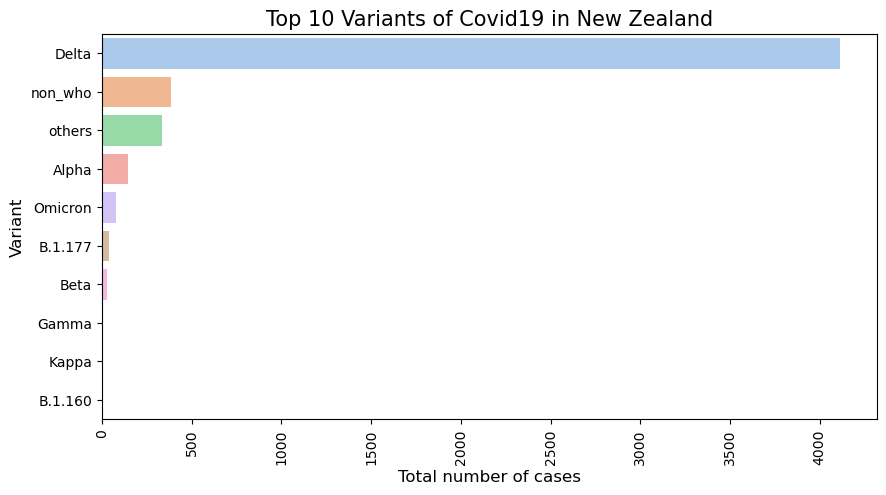

In [21]:
nz_top10 = New_Zealand.groupby('variant')['num_sequences'].sum().sort_values(ascending=False).reset_index()[:10]
plt.figure(figsize=(10,5))

sns.barplot(nz_top10, x='num_sequences', y='variant', palette = "pastel")

plt.xticks(rotation = 90)
plt.xlabel("Total number of cases", fontsize = 12)
plt.ylabel("Variant", fontsize = 12)
plt.title("Top 10 Variants of Covid19 in New Zealand", fontsize =15)

Total number of cases in New Zealand were mostly Delta variant (4,113 cases)

# Time series about the spread of 5 variants in New Zealand

In [22]:
#Create Time series of 5 variants - Delta, Alpha, B.1.177, Omicron, Gamma

nz_delta = New_Zealand[New_Zealand['variant']=='Delta']
nz_alpha = New_Zealand[New_Zealand['variant']=='Alpha']
nz_b = New_Zealand[New_Zealand['variant']=='B.1.177']
nz_omicron = New_Zealand[New_Zealand['variant']=='Omicron']
nz_gamma = New_Zealand[New_Zealand['variant']=='Gamma']

nz_delta_date = nz_delta.groupby('date')['num_sequences'].sum().reset_index()
nz_alpha_date = nz_alpha.groupby('date')['num_sequences'].sum().reset_index()
nz_b_date = nz_b.groupby('date')['num_sequences'].sum().reset_index()
nz_omicron_date = nz_omicron.groupby('date')['num_sequences'].sum().reset_index()
nz_gamma_date = nz_gamma.groupby('date')['num_sequences'].sum().reset_index()

plt.figure(figsize=(16,9))
fig = go.Figure()

fig.add_trace(go.Scatter(x = nz_delta_date['date'],
                         y = nz_delta_date['num_sequences'],
                         mode = 'lines',
                         name = 'Delta',
                         marker_color = 'DarkBlue'))

fig.add_trace(go.Scatter(x = nz_alpha_date['date'],
                         y = nz_alpha_date['num_sequences'],
                         mode = 'lines',
                         name = 'Alpha',
                         marker_color = 'DarkOrchid',
                         line = dict(dash = 'dot')))

fig.add_trace(go.Scatter(x = nz_b_date['date'],
                         y = nz_b_date['num_sequences'],
                         mode = 'lines',
                         name = 'B.1.177',
                         marker_color = 'RoyalBlue',
                         line = dict(dash = 'dashdot')))

fig.add_trace(go.Scatter(x = nz_omicron_date['date'],
                         y = nz_omicron_date['num_sequences'],
                         mode = 'lines',
                         name = 'Omicron',
                         marker_color = 'Crimson',
                         line = dict(dash = 'dash')))
fig.add_trace(go.Scatter(x = nz_gamma_date['date'],
                         y = nz_gamma_date['num_sequences'],
                         mode = 'lines',
                         name = 'Gamma',
                         marker_color = 'LightSeaGreen'))

fig.update_layout(title = '<b>Spread of 5 Variants in New Zealand<b>',
                  title_x = 0.5,
                  title_font= dict(size = 20),
                  template = 'plotly_white')

fig.show()

<Figure size 1600x900 with 0 Axes>

In New Zealand, the Delta variant started increasing in September 2021. The highest of total daily cases number was in Noverber 2021 and then decreased. The newest Omicron variant started in New Zealand in January 2022.

# Time series to compare the total cases number between New Zealand and Australia

In [23]:
#Make a new data frame of Australia

Australia = df[df['location']=='Australia']
Australia

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
2328,Australia,2020-05-11,Alpha,0,0.00,148
2329,Australia,2020-05-11,B.1.1.277,0,0.00,148
2330,Australia,2020-05-11,B.1.1.302,0,0.00,148
2331,Australia,2020-05-11,B.1.1.519,0,0.00,148
2332,Australia,2020-05-11,B.1.160,0,0.00,148
...,...,...,...,...,...,...
3379,Australia,2021-12-27,Omicron,1319,76.42,1726
3380,Australia,2021-12-27,S:677H.Robin1,0,0.00,1726
3381,Australia,2021-12-27,S:677P.Pelican,0,0.00,1726
3382,Australia,2021-12-27,others,1,0.06,1726


In [24]:
#Create Time series to compare the total cases number between New Zealand and Australia

New_Zealand_data = New_Zealand.groupby('date')['num_sequences_total'].sum().reset_index()
Australia_data = Australia.groupby('date')['num_sequences_total'].sum().reset_index()


plt.figure(figsize=(16,9))
fig = go.Figure()

fig.add_trace(go.Scatter(x = New_Zealand_data['date'],
                         y = New_Zealand_data['num_sequences_total'],
                         mode = 'lines',
                         name = 'New Zealand',
                         marker_color = 'Red'))

fig.add_trace(go.Scatter(x = Australia_data['date'],
                         y = Australia_data['num_sequences_total'],
                         mode = 'lines',
                         name = 'Australia',
                         marker_color = 'Blue'))

fig.update_layout(title = '<b>Total cases between New Zealand and Australia<b>',
                  title_x = 0.5,
                  title_font= dict(size = 20, color = 'DarkRed'),
                  template = 'plotly_white')

fig.show()

<Figure size 1600x900 with 0 Axes>

Covid19 in Australia started spreading in July 2020 and had a highest daily total cases number around August 2020 then decreased. 
The Covid19 second wave of Australia started in July 2021, and had a peak in September 2021.
In New Zealand, Covid19 started spreading later in August 2021 and had the highest daily case number in September 2021.

**Note** : I am very very new at Kaggle. 
Please give me an upvote if you like it. 
Any feedback or suggestion would be great. 
Thank you :)